In [1]:
import cv2
import imutils
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

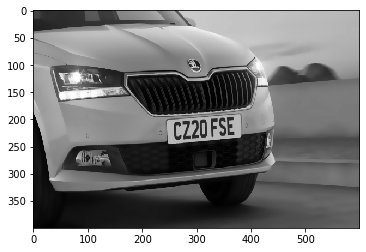

In [8]:
img = cv2.imread('plate2.jpeg')
img = cv2.resize(img, (600,400) )

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray = cv2.bilateralFilter(gray, 13, 15, 15) 
plt.imshow(gray,'gray')

In [ ]:
edged = cv2.Canny(gray, 30, 200) 
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break
#mask1 = np.zeros(gray.shape,np.uint8)
if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)
#print(mask1)
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

text = pytesseract.image_to_string(Cropped, config='--psm 11')

print("Detected license plate Number is:",text)
img = cv2.resize(img,(500,300))
Cropped = cv2.resize(Cropped,(400,200))
cv2.imshow('car',img)
cv2.imshow('Cropped',Cropped)

cv2.waitKey(0)
cv2.destroyAllWindows()

Detected license plate Number is: C720 FSE

